In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [6]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer_dictionary = load_breast_cancer()

In [10]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
df = pd.DataFrame(cancer_dictionary['data'], columns=cancer_dictionary['feature_names'])

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 1) Scale the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(df)

In [19]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
scaled_X.mean()

-6.118909323768877e-16

# 2) PCA with sklearn

In [21]:
from sklearn.decomposition import PCA

In [24]:
# help(PCA)

In [25]:
pca_model = PCA(n_components=2)

Sklearn will do the following:
+ Fitting will find Eigen Values and Eigen Vectors
+ Transorm will project those values (making dot product) on the original data

In [27]:
pca_results = pca_model.fit_transform(scaled_X) 
pca_results

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

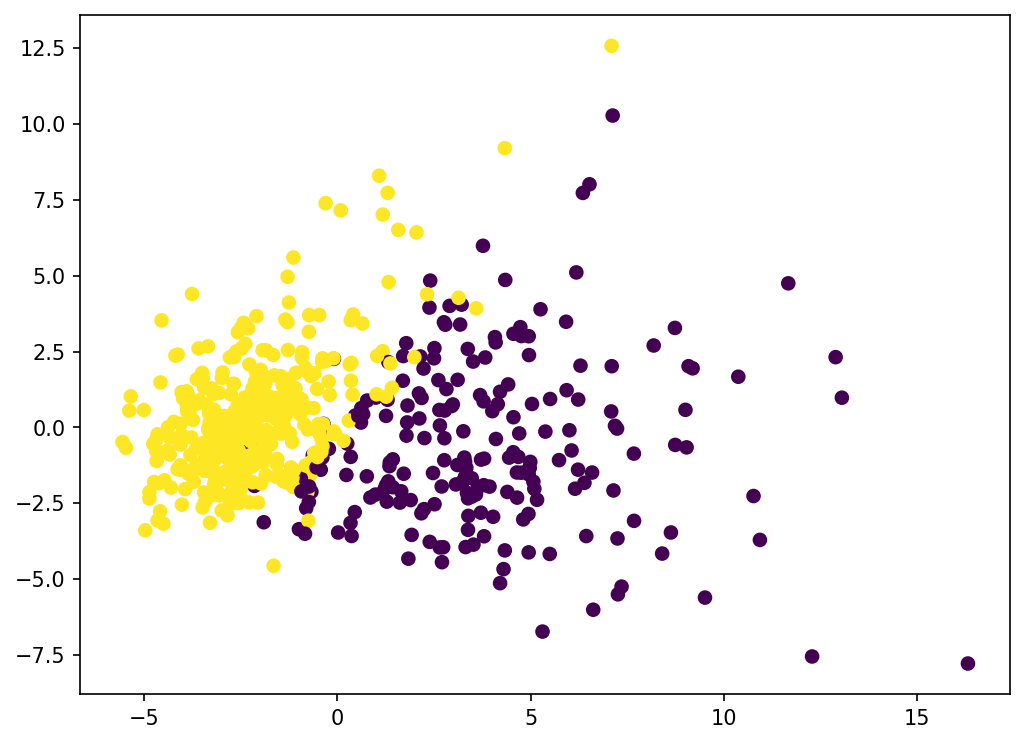

In [33]:
plt.figure(figsize=(8,6), dpi=150)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=cancer_dictionary['target']);

------

# 3) Principal Components of the model

In [34]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [35]:
df_comp = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns=df.columns)

In [36]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


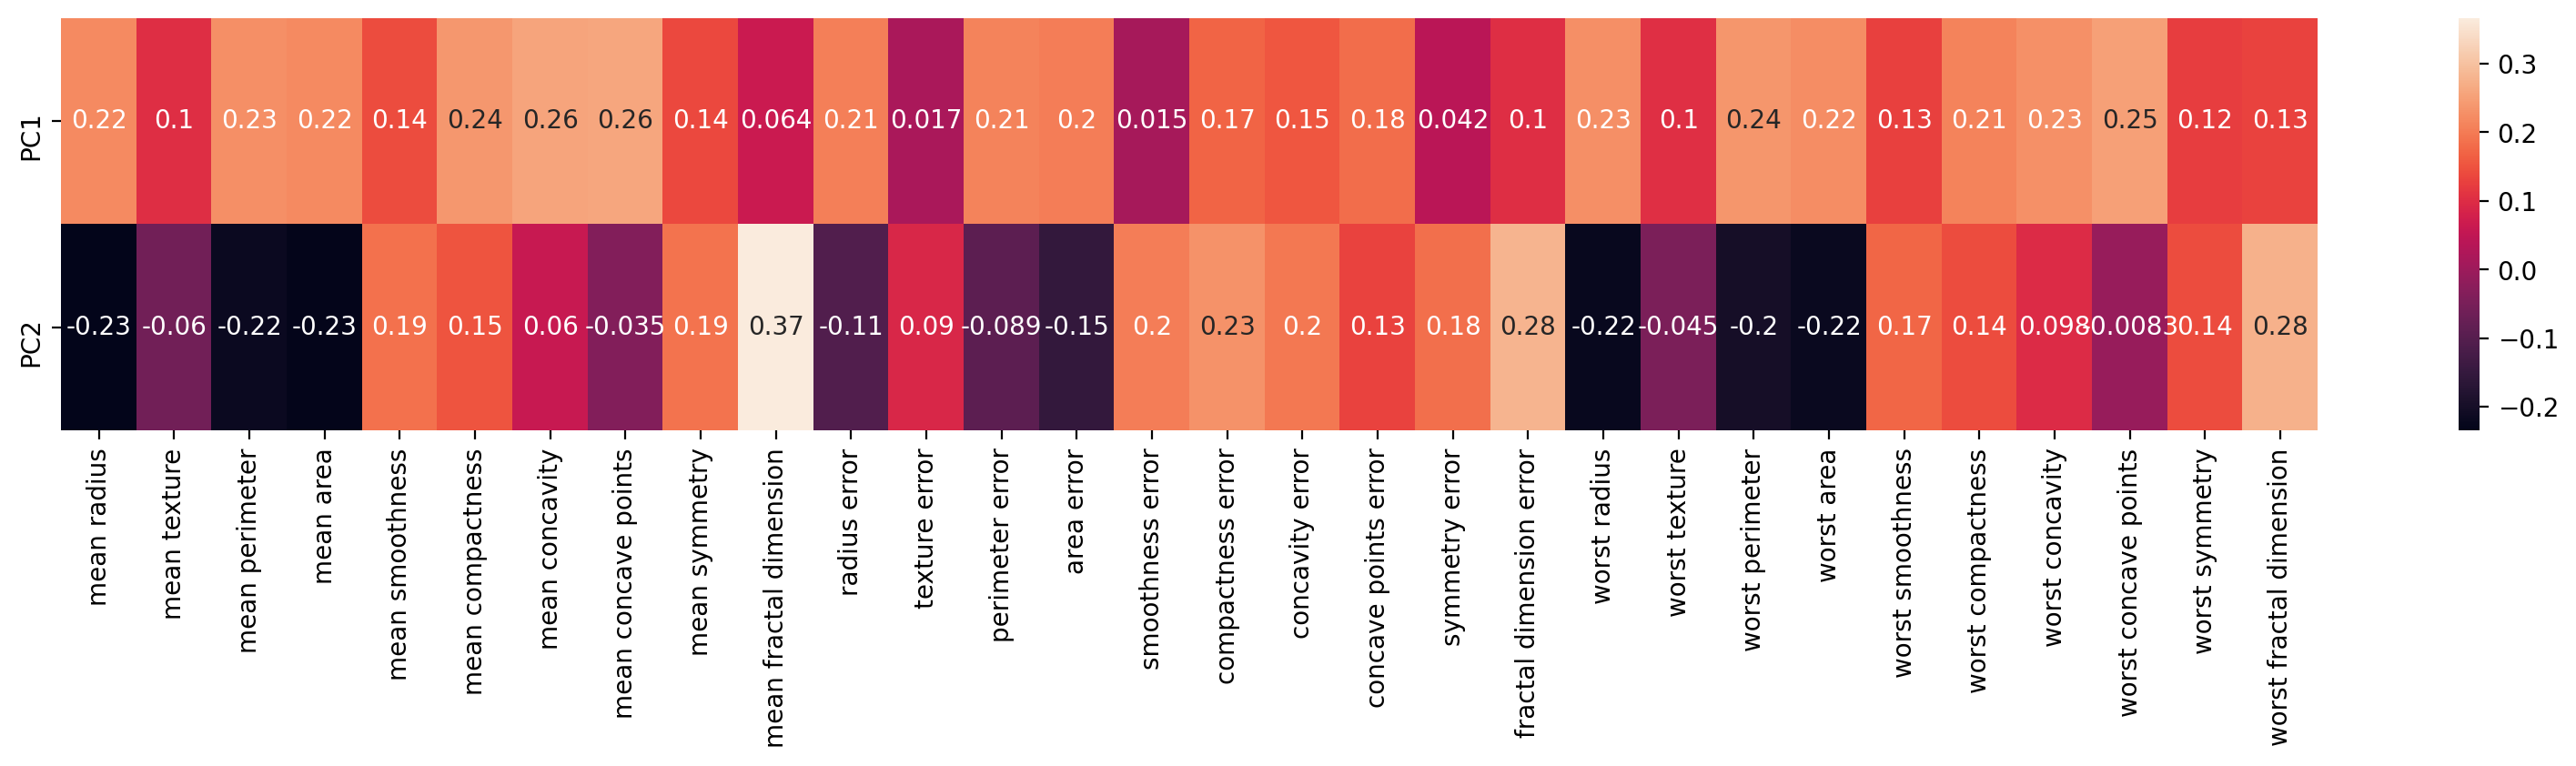

In [42]:
plt.figure(figsize=(20,3), dpi=200)
sns.heatmap(df_comp, annot=True);

# 4) Explained Variance Ratio

This means first principal component explains 44.27% variance of the data and second one explains around 19%.

Both components can explain 63% of the variance of the dataset. We lose around 37% of the explained variance.

In [44]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [45]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155942

---------

# Expirementation

If choosing 2 Principal Component can explain 63% of variance of data and lose around 37%.

What if we increase the number of Principal Component, what will happen?

In [46]:
pca_30 = PCA(n_components=30)

In [47]:
pca_30.fit(scaled_X) # we don't really need to transform here as we are only interested to find out ratio.

PCA(n_components=30)

In [49]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [51]:
np.sum(pca_30.explained_variance_ratio_)

1.0

Above value 1.0 makes scense. Because we are using 30 principal components out of original 30 features. Of course, we didn't lose any explained variance at all. As a result, the value is 1.0 (100%).

### Let's find out for various number of Principal Components

In [55]:
len(scaled_X[0])

30

In [57]:
explained_variance = []

for n in range(1, len(scaled_X[0])):
    pca_model = PCA(n_components=n)
    pca_model.fit(scaled_X)
    
    variance_ratio_total = np.sum(pca_model.explained_variance_ratio_)
    explained_variance.append(variance_ratio_total)

## Using this elbow method, we can figure out what is the best `n_componet` to choose.

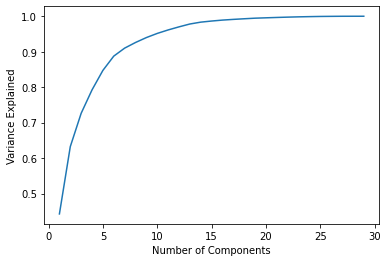

In [63]:
plt.plot(range(1, len(scaled_X[0])), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained');

The graph above make sense. As we increase the number of components, variance explained also get increase. 

Because we are getting close to the number of features as we increase the numer of components which decreases the loss of the explained variance.

**NOTE THAT** even around 1 or 2 componets, we are getitng 40% of explained variance and it gets increasing. However around 10 number of Principal Componets, it gets flatting out which means we are **NOT** adding that much explained variance.

So in this case, we might want to choose 10 as our `n_component` value.